In [1]:
# Import libraries
import cv2 as cv
import os
import io
from matplotlib import pyplot as plt
import numpy as np

x_train = []
y_train =[]

# Upload dan read file

# Cat
base_path_cat = 'PetImages/Cat/'
  
for i, image_path in enumerate (os.listdir(base_path_cat)):

    img = cv.imread(base_path_cat+image_path)
    
    if img is None:
        continue
    
    img = cv.resize(img, (100,100))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    x_train.append(img)
        
    y_train.append(0) # 0  = cat

# Dog
base_path_cat = 'PetImages/Dog/'
  
for i, image_path in enumerate (os.listdir(base_path_cat)):

    img = cv.imread(base_path_cat+image_path)
    
    if img is None:
        continue
    
    img = cv.resize(img, (100,100))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    x_train.append(img)
        
    y_train.append(1) # 1  = dog

x_train = np.array(x_train)
y_train = np.asarray(y_train)

print("Train Shape: {}".format(x_train.shape))
print("Target Shape: {}".format(y_train.shape))

Train Shape: (24946, 100, 100)
Target Shape: (24946,)


In [2]:
# Split training dan testing dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19956, 100, 100)
(4990, 100, 100)
(19956,)
(4990,)


In [3]:
# Reshape features
x_train = x_train.reshape(-1, 100,100, 1)
x_test = x_test.reshape(-1, 100,100, 1)
x_train.shape, x_test.shape

((19956, 100, 100, 1), (4990, 100, 100, 1))

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scaling features menjadi 0 hingga 1
x_train = x_train / 255.
x_test = x_test / 255.

# Menggunakan bantuan OneHotEncoder pada target
from sklearn.preprocessing import OneHotEncoder
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = OneHotEncoder(sparse=False).fit_transform(y_train)
y_test = OneHotEncoder(sparse=False).fit_transform(y_test)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Membuat Model CNN dengan 3 layer Convolusi + Relu + Maxpooling
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape =x_train.shape[1:], padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="same"))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization()) # Batch Normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="same"))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

# loss dengan categorial crossentropy dan optimizer dengan adam
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.125)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      160       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                    

In [6]:
# Print hasil prediksi dengan data test
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = np.asarray(tf.argmax(y_pred, axis = 1))
y_test = np.asarray(tf.argmax(y_test, axis = 1))
y_pred, y_test

(array([1, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 0, 1, 1], dtype=int64))

In [7]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[2115  385]
 [ 451 2039]]


In [8]:
# Print Skor Akurasi Testing
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8324649298597194


<function matplotlib.pyplot.show(close=None, block=None)>

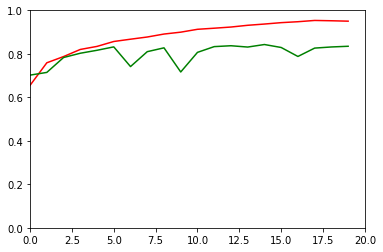

In [9]:
# Plotting Akurasi testing dan Akurasi validasi 
plt.plot(history.history['accuracy'], color="red")
plt.plot(history.history['val_accuracy'], color='green')
plt.axis([0,20,0,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

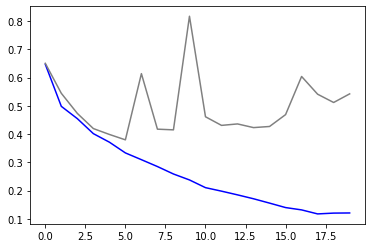

In [10]:
# Plotting loss testing dan loss validasi
plt.plot(history.history['loss'], color="blue")
plt.plot(history.history['val_loss'], color='gray')
plt.show